# Predicting Median House Values in California using Linear Regression

**Case Study:**

The goal of this case study is to develop a linear regression model to predict the median house values in California based on various features. By exploring and analyzing the dataset, performing data cleaning and preprocessing, fitting a linear regression model, and evaluating its performance, the aim is to create an accurate predictive model that can estimate median house values for different locations in California.

## Dataset description

The California Housing dataset is a popular dataset used for regression tasks, specifically for predicting housing prices. It contains information about various features of houses in different locations in California, along with their corresponding median house values.

Here is a description of the features in the California Housing dataset:

- **MedInc:** Median income of the block.
- **HouseAge:** Median age of the houses in the block.
- **AveRooms:** Average number of rooms per dwelling.
- **AveBedrms:** Average number of bedrooms per dwelling.
- **Population:** Total population in the block.
- **AveOccup:** Average number of occupants per dwelling.
- **Latitude:** Latitude coordinate of the block.
- **Longitude:** Longitude coordinate of the block.

The target variable in the dataset is:

MedHouseVal: Median house value of the block (the target variable you'll aim to predict).

In [40]:
import numpy as np
from sklearn.datasets import fetch_california_housing
import pandas as pd
from sklearn.linear_model import LinearRegression

# Fetch the California Housing dataset
data = fetch_california_housing()


# Create a DataFrame from the dataset
df = pd.DataFrame(data=np.c_[data['data'], data['target']],
                  columns=data['feature_names'] + data['target_names'])




## Exploratory Data Analysis


### Descriptive Statistics

Obtain an overview of the dataset by using Python built-in functions to display the first few rows, get the summary of the DataFrame, calculate basic descriptive statistics, etc...

In [42]:
# Display the first few rows of the DataFrame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [43]:
# Summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [44]:
# Basic descriptive statistics
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [45]:
# Check for missing values
df.isnull().any()

MedInc         False
HouseAge       False
AveRooms       False
AveBedrms      False
Population     False
AveOccup       False
Latitude       False
Longitude      False
MedHouseVal    False
dtype: bool

In [46]:
# Calculate the correlation between variables
corr = df.corr()

### Create Plots

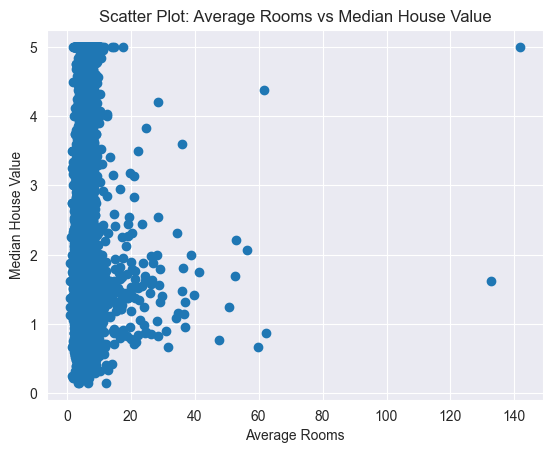

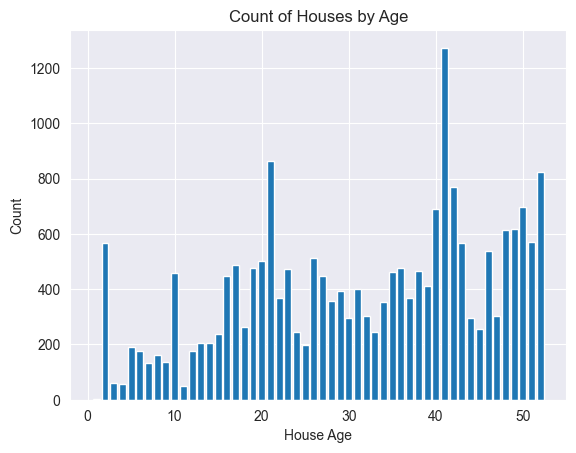

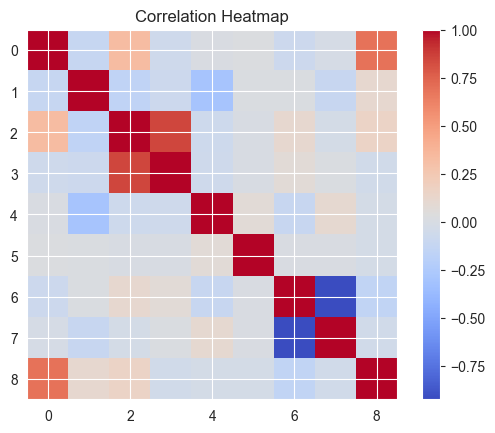

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns



# Scatter Plot

plt.scatter(df['AveRooms'], df['MedHouseVal'])
plt.xlabel('Average Rooms')
plt.ylabel('Median House Value')
plt.title('Scatter Plot: Average Rooms vs Median House Value')
plt.show()

# Bar Chart

plt.bar(df['HouseAge'].unique(), df['HouseAge'].value_counts())
plt.xlabel('House Age')
plt.ylabel('Count')
plt.title('Count of Houses by Age')
plt.show()

# Correlation Heatmap


plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Correlation Heatmap')
plt.show()

## Fit a Linear Regression

### Import Libraries

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

### Split Data

In [52]:

# Split the data into features (X) and target (y)
x = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']



# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)



In [53]:
# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(x_train, y_train)

# Evaluate the model on the test set
y_pred = model.predict(x_test)


print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


Mean Squared Error: 0.5289841670367209
